<a href="https://colab.research.google.com/github/KhalandarMokula/Boston-Housing-Price-Prediction/blob/main/Boston_Housing_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(1)

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [ ]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [ ]:
#CRIM     per capita crime rate by town'
#ZN       proportion of residential land zoned for lots over 25,000 sq.ft.'
#INDUS    proportion of non-retail business acres per town',
# CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
#NOX      nitric oxides concentration (parts per 10 million)',
#RM       average number of rooms per dwelling',
#AGE      proportion of owner-occupied units built prior to 1940',
# DIS      weighted distances to five Boston employment centres',
#RAD      index of accessibility to radial highways',
#TAX      full-value property-tax rate per $10,000',
#PTRATIO  pupil-teacher ratio by town',
#B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#LSTAT    % lower status of the population',
# MEDV     Median value of owner-occupied homes in $1000's",

In [ ]:
#DataFrame Referring to abbrevations of Feature variables.
feature_abbrevations = ['per capita crime rate by town','proportion of residential land zoned for lots over 25,000 sq.ft.',
                        'proportion of non-retail business acres per town',' Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
                        'nitric oxides concentration (parts per 10 million)','average number of rooms per dwelling','proportion of owner-occupied units built prior to 1940',
                        'weighted distances to five Boston employment centres','index of accessibility to radial highways','full-value property-tax rate per \$ 10,000',
                        'pupil-teacher ratio by town','1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town','% lower status of the population',
                        'Median value of owner-occupied homes in \$1000']
features =pd.DataFrame(boston.feature_names,columns=['feature'])
features["feature_names"] = pd.DataFrame(feature_abbrevations)
features

,feature,feature_names
0,CRIM,per capita crime rate by town
1,ZN,proportion of residential land zoned for lots ...
2,INDUS,proportion of non-retail business acres per town
3,CHAS,Charles River dummy variable (= 1 if tract bo...
4,NOX,nitric oxides concentration (parts per 10 mill...
5,RM,average number of rooms per dwelling
6,AGE,proportion of owner-occupied units built prior...
7,DIS,weighted distances to five Boston employment c...
8,RAD,index of accessibility to radial highways
9,TAX,"full-value property-tax rate per \$ 10,000"


In [ ]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
df["MEDV"] = boston.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


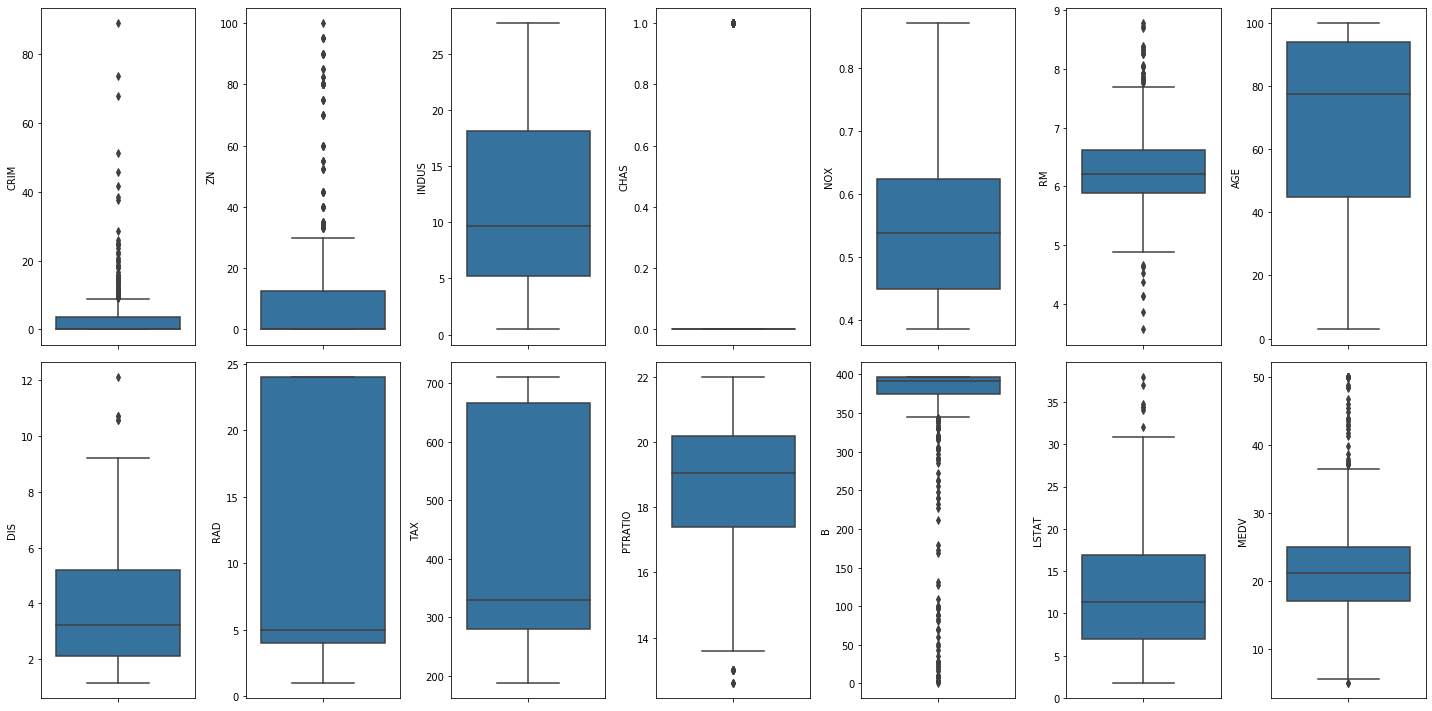

In [ ]:
fig,axs = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0 #subplot index(positions)
axs = axs.flatten() #flatten the axs to iterate over the subplot
for k,v in df.items():
    sns.boxplot(y=k,data=df,ax=axs[index],saturation=0.7)
    index=index+1
plt.tight_layout()

>It seems like columns CRIM,ZN,B,RM have outliers,
Let us calculate the percentage of outliers in them.

In [ ]:
#Calculating percentage of outliers in each column.
for k,v in df.items():
    q1 = v.quantile(0.25) # it gives the values which are at 0.25 quantile.
    #print(q1)
    q3 = v.quantile(0.75) #it gives the values which are at 0.75 quantile.
    #print(q3)
    iqr = q3-q1 # inter quantile range
    #get all the rows beyond +-1.5 iqr 
    #outliers in respective columns
    v_col = v[(v <= q1 - 1.5 * iqr) | (v>= q3 + 1.5 * iqr)]
    percentage = v_col.shape[0] *100 / df.shape[0]
    print("Column %s outliers =%.2f%%" %(k,percentage))

Column CRIM outliers =13.04%
Column ZN outliers =13.44%
Column INDUS outliers =0.00%
Column CHAS outliers =100.00%
Column NOX outliers =0.00%
Column RM outliers =5.93%
Column AGE outliers =0.00%
Column DIS outliers =0.99%
Column RAD outliers =0.00%
Column TAX outliers =0.00%
Column PTRATIO outliers =2.96%
Column B outliers =15.22%
Column LSTAT outliers =1.38%
Column MEDV outliers =7.91%


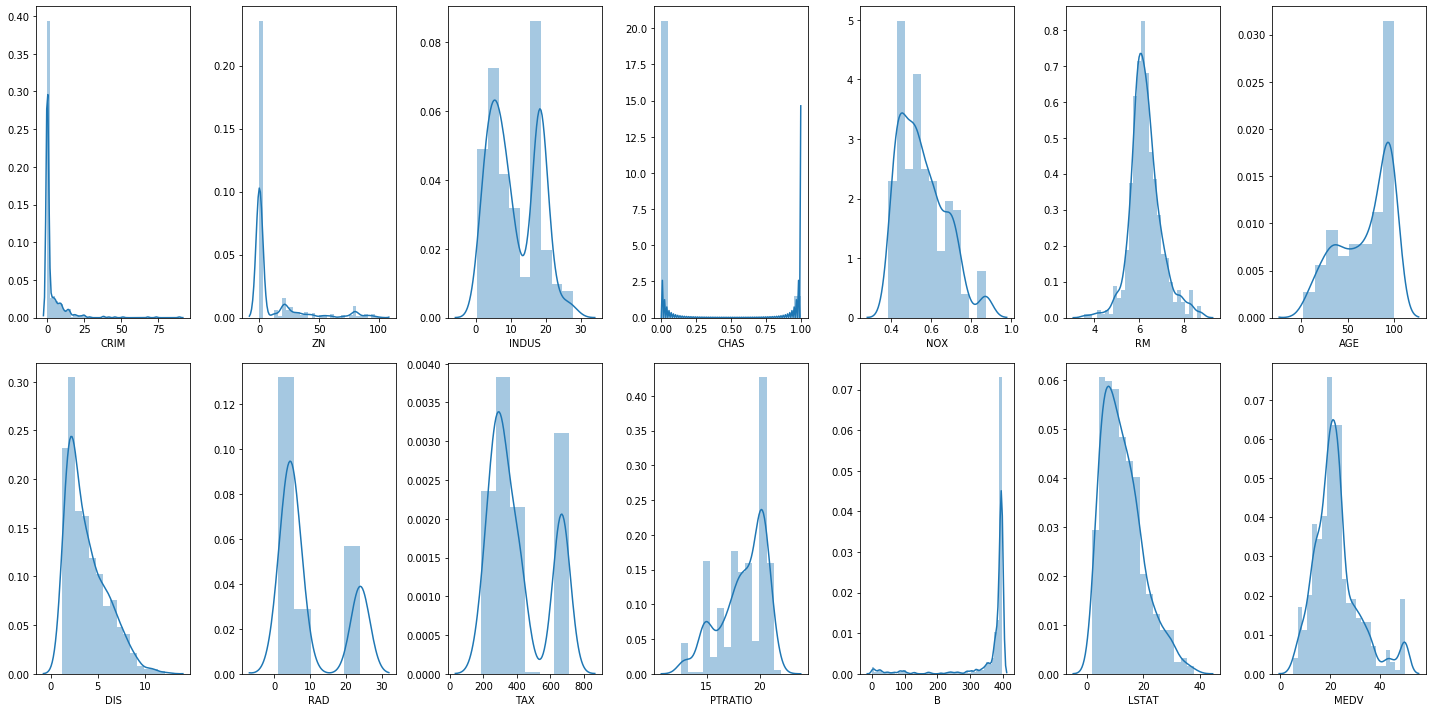

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index=0
axs=axs.flatten()
for k,v in df.items():
    sns.distplot(v,ax=axs[index])
    index+=1
plt.tight_layout()

The histograms shows that the columns 'CRIM','ZN' and 'B' have Skewed distributuions and 'MEDV' our target Varible is having Normal distribution.

Lets see the correlations between the features

(0, 14)

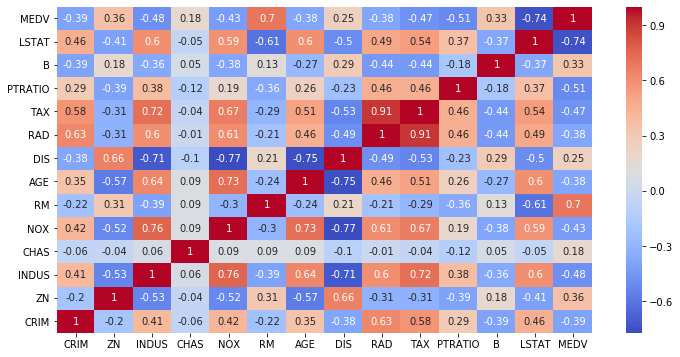

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr().round(2),annot=True,cmap='coolwarm')
plt.ylim(0,df.shape[1])

Observations:

*   'MEDV' and 'RM' has high positive correlation. It does makes sense right?
>   'more the number of rooms per dwelling more the median value(price) of house.'
*  'MEDV' and 'LSTAT' has a high negative correlation. this also makes sense right?
>  'more the population of low status(low income) people lesser the price according to data'.
*   'TAX' is having negative correlation with 'MEDV'.
>   Reason might be,'When the property tax decreases,buyers realize that the cost of living also decreases and they are thus willing to pay a higher price for the house.'
*  'LSTAT', 'TAX', 'PTRATIO', 'INDUS' and 'RM' have correlation which >= +-0.5 with respect to MEDV 
which tells that these features have more influence on 'MEDV'(Dependant Variable).
>  'this tells that these features have more influence on 'MEDV'(Dependant Variable).'
*   'TAX' and 'RAD' are highly correlated to eachother.
>   'RAD is the ranking given based on accessibility to radial highways, More the accesibility more is the tax charged.'

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

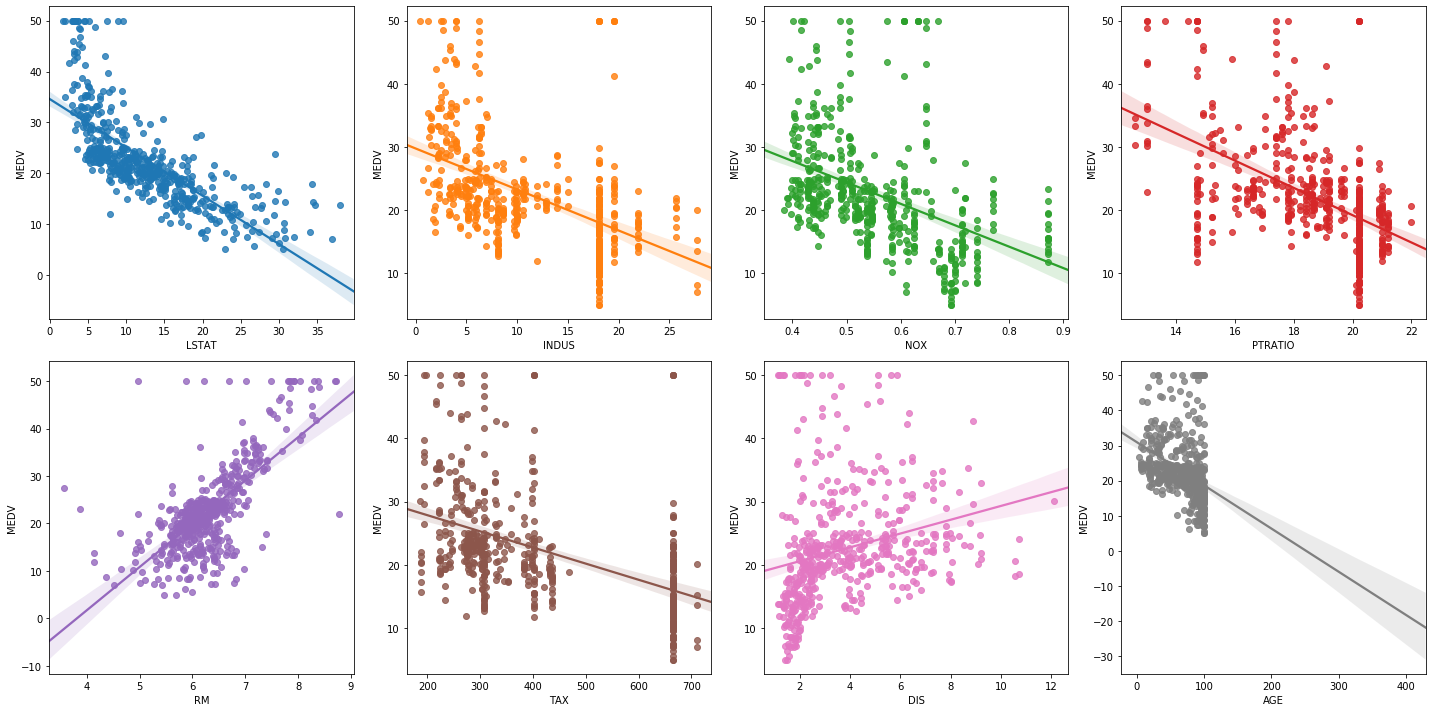

In [ ]:
columns = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df.loc[:,columns]
y = df['MEDV']
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(columns):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout()



> We observe that the features AGE,NOX and INDUS have high negative correlation with feature DIS.

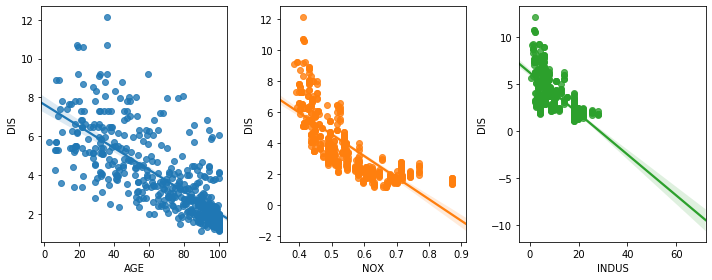

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10, 4))
axs= axs.flatten()
for i,k in enumerate(['AGE','NOX','INDUS']):
    sns.regplot(y=x['DIS'],x=x[k],ax=axs[i])
plt.tight_layout()



> With this analysis we migth try predicting MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS' and 'AGE' features. But before doing that we will first train on entire dataset.



Implementing Linear Regression from Scratch

In [ ]:
import math
class LinearRegression:
    """
    Ordinary least squares Linear Regression.
    LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
    to minimize the residual sum of squares between the observed targets in
    the dataset, and the targets predicted by the linear approximation.
    
    Parameters
    ----------
    X: Independent Feature vectors from the dataset.
    y: Dependent variable(Target variable) from the dataset.
    l_rate: Learning rate for Gradient Descent Optimization.
    
    Attributes
    ----------
    theta: Paramter Matrix , Calculated Weights of each feature variable.
    residual : Difeerence between actual and predicted target variable,used for evaluation.
    y_pred_final : Final prediction on training set obtained after maximum optimization of theta.
    
    Notes
    -----
    From the implementation point of view, this is just very basic plain Linear Regression 
    with Gradient Descent implementation wrapped as a predictior object.
    """
    
    def __init__(self,x,y,l_rate):
        """
        x: input shape: M,N
            M: no of training examples.
            N: no of features.
        y: target shape:M,1
        l_rate: floating point number.
        """
        self.x = x
        self.y = y
        self.l_rate = l_rate

    def initialize_theta(self,initialization="Zeros"):
        """
        Initialize parmater theta to Zeros,Random or He initilization on basis of 
        parameter initialization
        Theta : parameter shape:N,1
        N: no of features.
        """
        n = self.x.shape[1]
        if initialization == "Zeros":
            self.theta = np.zeros((n,1))
        elif initialization == "Random":
            self.theta = np.ones((n,1))
            #self.theta = np.random.randn(n,1)
        elif initialization=='He':
            self.theta = np.random.randn(n,1)/np.sqrt(self.x.shape[0])
    
    def Residuals(self):
        """
        Calculate the prediction(target variable) 
        prediction [M,1]: M,N dot N,1 matrix of values
        return:
            Residual(difference between original and prediction)
            shape : M,1
        """
        y_pred = np.dot(self.x,self.theta)
        self.residual = y_pred - self.y

    def Cost(self):
        """
        return:
            cost 1/2*m(sum(residual*residual))
        """
        self.Residuals()
        self.m = self.x.shape[0]
        self.cost = np.square(self.residual)/(2*self.m)
        return np.sum(self.cost,axis=0)
    def update_theta(self):
        """
        Updating the paramneter matix theta of dimension N*1 for optimizing performance
        """
        self.theta-= self.l_rate*np.dot(self.x.T,self.residual)
      
    def final_prediciton(self):
        """
        return:
        Train_set predicion
        shape: M,1
        """
        #self.y_pred_final = np.dot(self.x,self.theta)
        return np.dot(self.x,self.theta)
    def predict_sample(self,test):
        """
        return :
        sample prediction
        shape: S,1
        S: no of samples
        """
        #self.y_pred_final=np.dot(test,self.theta)
        return np.dot(test,self.theta)
    def rmse(self,y_orig,y_pred):
        """
        Root Mean Squared Evaluation Metric
        return:
            rmse.
        """
        # sum of square of residuals
        mse = np.sum((y_orig-y_pred)**2)
        #Root Mean squared Error
        error = np.sqrt(mse/self.m)
        return error
    def r_squared(self,y_orig,y_pred):
        # sum of square of residuals
        ss_r = np.sum((y_orig-y_pred)**2)
        # total sum of squares
        ss_t = sst = np.sum((y_orig - np.mean(y_orig))**2)
        # R2 score
        r2_score = 1 - (ss_r/ss_t)
        return r2_score

In [ ]:
#dividing the datafame into X and y variable.
X = df.iloc[:,:-1]
y = df.iloc[:,-1].values

In [ ]:
X.shape

(506, 13)

Splitting the data into train and test set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
X_test.shape

(152, 13)

Applying Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [ ]:
X_train_sc = sc_X.fit_transform(X_train.values)
y_train_sc = sc_y.fit_transform(y_train.reshape(len(y_train),1))
#y_train_sc = sc_y.fit_transform(y_train)

In [ ]:
X_test_sc = sc_X.transform(X_test.values)
y_test_sc = sc_y.transform(y_test.reshape(len(y_test),1))

Instantiating our LinearRegression model

In [ ]:
lr = LinearRegression(X_train_sc,y_train_sc,l_rate= 0.0000000055)# 0.000000001

Initializing weights

In [ ]:
lr.initialize_theta(initialization="Random") #I found random initialization producing good results.

Performing Gradient Descent and updating weights

In [ ]:
n_iterations =7000000 #125
costs=[]
for i in range(n_iterations):
    costs.append(lr.Cost())
    #performing gradient descent
    lr.update_theta()

Making Predictions on Train set (Evaluating train set model performance)

In [ ]:
predictions = lr.final_prediciton()
score = lr.rmse(y_train_sc,predictions)
r2_score_train = lr.r_squared(y_train_sc,predictions)
#print("Rmse score is {}".format(score))
print("R2 score is {}".format(r2_score_train))

R2 score is 0.7039053074898514


In [ ]:
residuals_lr = y_train_sc - predictions

Plotiing Grdient Descent

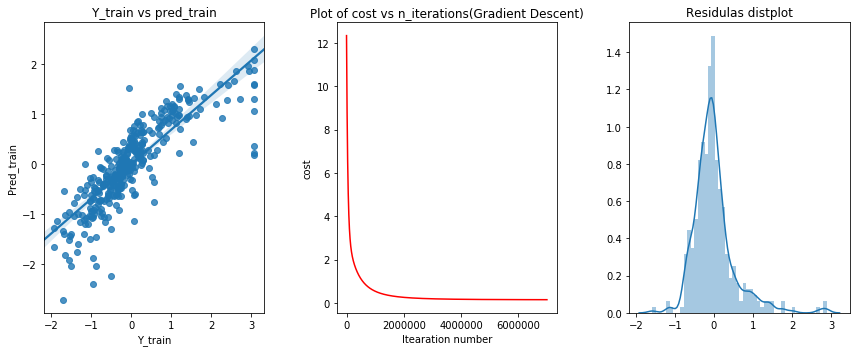

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
#plt.scatter(y_train_sc,predictions)
sns.regplot(pd.Series(data=np.ravel(y_train_sc),name='y_orig'),pd.Series(data=np.ravel(predictions),name='predictions'))
plt.title("Y_train vs pred_train")
plt.xlabel("Y_train")
plt.ylabel("Pred_train")

plt.subplot(1,3,2)
plt.plot(range(n_iterations),np.squeeze(costs),'r')
plt.title('Plot of cost vs n_iterations(Gradient Descent)')
plt.xlabel('Itearation number')
plt.ylabel('cost')

plt.subplot(1,3,3)
sns.distplot(residuals_lr,bins=50)
plt.title("Residulas distplot")
#plt.show()
plt.tight_layout()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
pred = sc_y.inverse_transform(predictions)

In [ ]:
print("Mean absolute Error: ",mean_absolute_error(sc_y.inverse_transform(y_train_sc),pred))
print("Mean Squared Error: ",mean_squared_error(sc_y.inverse_transform(y_train_sc),pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(sc_y.inverse_transform(y_train_sc),pred)))

Mean absolute Error:  3.2903030044343766
Mean Squared Error:  24.03965071763579
Root Mean Squared Error:  4.903024649911092


Making Predictions on test data and evaluating test set models performance

In [ ]:
predictions_test_sc = lr.predict_sample(X_test_sc)
predictions_test = sc_y.inverse_transform(predictions_test_sc)

In [ ]:
res=sc_y.inverse_transform(y_test_sc)-sc_y.inverse_transform(predictions_test_sc)

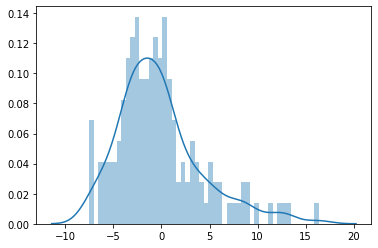

In [ ]:
sns.distplot(res,bins=50)

In [ ]:
score = lr.rmse(sc_y.inverse_transform(y_test_sc),predictions_test)
r2_score_test = lr.r_squared(sc_y.inverse_transform(y_test_sc),predictions_test)
#print(np.squeeze(predictions).shape)
#print("Residual: " ,y_train_sc-predictions)
#print("Rmse score is {}".format(score))
print("R2 score is {}".format(r2_score_test))

R2 score is 0.7868774797050919


In [ ]:
print("Mean absolute Error: ",mean_absolute_error(sc_y.inverse_transform(y_test_sc),predictions_test))
print("Mean Squared Error: ",mean_squared_error(sc_y.inverse_transform(y_test_sc),predictions_test))
print("RMSE: ",np.sqrt(mean_squared_error(sc_y.inverse_transform(y_test_sc),predictions_test)))

Mean absolute Error:  3.3303963683289064
Mean Squared Error:  19.533635287472872
RMSE:  4.419687238648553


Text(0.5, 1.0, 'Y_test_original Vs Predictions_test')

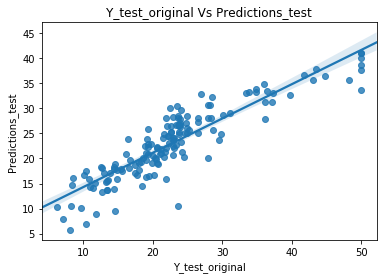

In [ ]:
#plt.scatter(sc_y.inverse_transform(y_test_sc),predictions_test)
sns.regplot(sc_y.inverse_transform(y_test_sc),predictions_test.ravel())
plt.xlabel('Y_test_original')
plt.ylabel('Predictions_test')
plt.title('Y_test_original Vs Predictions_test')

In [ ]:
df_pred= pd.DataFrame(data=y_test,columns=["Y_test"])

In [ ]:
df_pred["Pred_test"]=predictions_test.reshape(152,)

Below DataFrame shows the predictions and actual values of test set

In [ ]:
df_pred

,Y_test,Pred_test
0,28.2,30.630242
1,23.9,27.903060
2,16.6,18.113477
3,22.0,22.158487
4,20.8,18.868896
...,...,...
147,19.1,16.393099
148,28.4,28.017497
149,20.5,19.817334
150,33.8,33.349164


In [ ]:
print("Training score: "+str(r2_score_train*100))
print("Test score: "+str(r2_score_test*100))

Training score: 70.39053074898514
Test score: 78.6877479705092


Using LinearRegression class from scikit learn Library. Here we need not perform Feature Scaling.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
pred_lm = lm.predict(X_test)

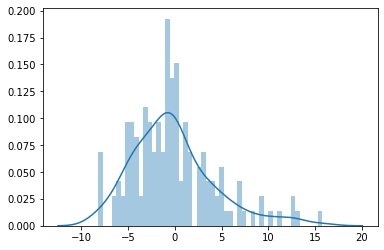

In [ ]:
sns.distplot(y_test-pred_lm,bins=50)

In [ ]:
results = pd.DataFrame(data=y_test,columns=["actual"])
results["predicted"]=pred_lm.reshape(len(pred_lm),1)

Text(0.5, 1.0, 'True Vs Predcited values')

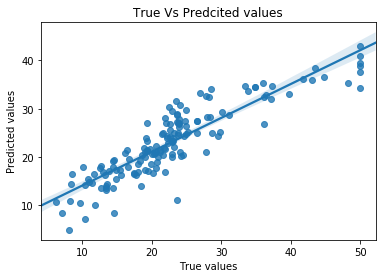

In [ ]:
sns.regplot(y_test,pred_lm)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True Vs Predcited values")

In [ ]:
results

,actual,predicted
0,28.2,32.391465
1,23.9,27.944013
2,16.6,17.837628
3,22.0,21.669414
4,20.8,18.936396
...,...,...
147,19.1,17.329959
148,28.4,28.360234
149,20.5,20.794228
150,33.8,33.698157


In [ ]:
print("Mean absolute Error: ",mean_absolute_error(y_test,pred_lm))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_lm))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,pred_lm)))

Mean absolute Error:  3.3446655035987582
Mean Squared Error:  19.831323672063345
RMSE:  4.453237437198172


In [ ]:
print("training score",lm.score(X_train,y_train)*100)
print("Test score",lm.score(X_test,y_test)*100)

training score 71.03879080674731
Test score 78.36295385076268


Using Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree = DecisionTreeRegressor()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [ ]:
pred_tree = dtree.predict(X_test)

In [ ]:
residuals_tree = y_test-pred_tree

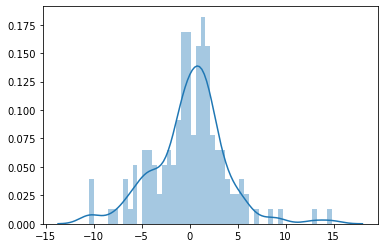

In [ ]:
sns.distplot(residuals_tree,bins=50)

Text(0.5, 1.0, 'True Vs Predcited values')

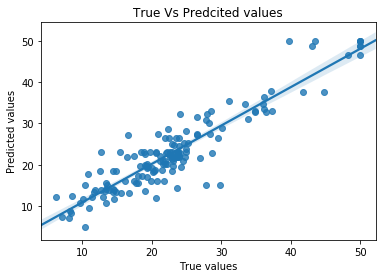

In [ ]:
sns.regplot(y_test,pred_tree)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True Vs Predcited values")

In [ ]:
print("Mean absolute Error: ",mean_absolute_error(y_test,pred_tree))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_tree))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,pred_tree)))

Mean absolute Error:  2.7585526315789473
Mean Squared Error:  14.525855263157894
RMSE:  3.811280003247976


In [ ]:
print("training score",dtree.score(X_train,y_train)*100)
print("Test score",dtree.score(X_test,y_test)*100)

training score 100.0
Test score 84.15150668289263


Decision Tree model is giving us 100% accuracy on training set and 84% on test set which is relatively less.\
Hence it seems like it is Overfitting the Training data (no bias but a little variance).

RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100)

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
pred_rf = rf.predict(X_test)

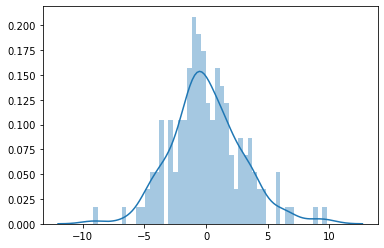

In [ ]:
sns.distplot(y_test-pred_rf,bins=50)

In [ ]:
results = pd.DataFrame(data=y_test,columns=["actual"])
results["predicted"]=pred_rf.reshape(len(pred_lm),1)
results

,actual,predicted
0,28.2,29.710
1,23.9,27.817
2,16.6,20.211
3,22.0,21.067
4,20.8,19.988
...,...,...
147,19.1,14.782
148,28.4,28.056
149,20.5,18.394
150,33.8,30.629


Text(0.5, 1.0, 'True Vs Predcited values')

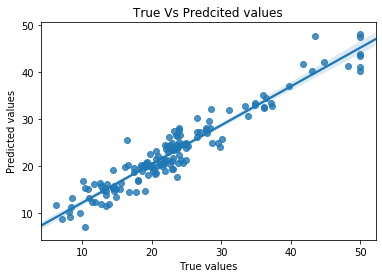

In [ ]:
sns.regplot(y_test,pred_rf)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True Vs Predcited values")

In [ ]:
print("Mean absolute Error: ",mean_absolute_error(y_test,pred_rf))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_rf))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,pred_rf)))

Mean absolute Error:  2.202677631578947
Mean Squared Error:  8.350172046052627
RMSE:  2.889666424702448


In [ ]:
print("training score",rf.score(X_train,y_train)*100)
print("Test score",rf.score(X_test,y_test)*100)

training score 98.07730949221694
Test score 90.88951091202104


In [ ]:
rfscore_train = rf.score(X_train,y_train)*100
rfscore_test = rf.score(X_test,y_test)*100


>We saw that the features 'AGE','NOX' and 'INDUS' are highly negatively correlated to Feature 'DIS'.
Thus we are Dropping 'DIS' as Multicollinearity is a problem (i.e 'independent variable should be independent'). But there is also a chance that DIS feature might have some significance in determining the price(i.e. practically it wont be completely insignificant), therefore we are just checking that if we drop DIS will it affect model performance (will it improve or reduce).

In [ ]:
df_1=df.drop(["DIS"],axis=1)

In [ ]:
rf_1 = RandomForestRegressor(n_estimators=100)

In [ ]:
X_drp_dis = df_1.iloc[:,:-1]
y_drp_dis = df_1.iloc[:,-1].values
X_train_dis,X_test_dis,y_train_dis,y_test_dis = train_test_split(X_drp_dis,y_drp_dis,test_size=0.3,random_state=1)

In [ ]:
rf_1.fit(X_train_dis,y_train_dis)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
pred_rf1 = rf_1.predict(X_test_dis)

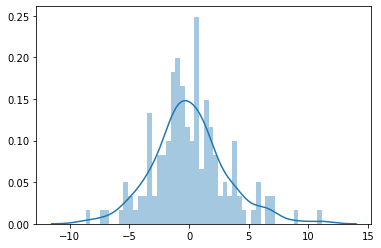

In [ ]:
sns.distplot(y_test_dis-pred_rf1,bins=50)

In [ ]:
results = pd.DataFrame(data=y_test_dis,columns=["actual"])
results["predicted"]=pred_rf1.reshape(len(pred_rf1),1)
results

,actual,predicted
0,28.2,28.750
1,23.9,26.357
2,16.6,20.811
3,22.0,20.530
4,20.8,20.241
...,...,...
147,19.1,14.852
148,28.4,27.891
149,20.5,19.197
150,33.8,31.718


Text(0.5, 1.0, 'True Vs Predcited values')

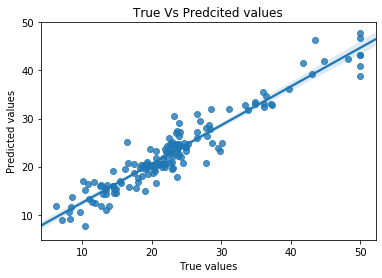

In [ ]:
sns.regplot(y_test_dis,pred_rf1)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True Vs Predcited values")

In [ ]:
print("training score: ",rf_1.score(X_train_dis,y_train_dis)*100)
print("Test score: ",rf_1.score(X_test_dis,y_test_dis)*100)

training score:  97.63890027212861
Test score:  89.65024440390067


In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train_dis,y_train_dis)
pred_lm2 = lm2.predict(X_test_dis)

In [ ]:
print("training score: ",lm2.score(X_train_dis,y_train_dis)*100)
print("Test score: ",lm2.score(X_test_dis,y_test_dis)*100)

training score:  68.08129871909689
Test score:  75.22069426004127


Observation:
> The model performance hasn't improved by dropping 'DIS',it is significant in determining target value.

Using Only top 3 correlated features with respect to MEDV

In [ ]:
X_top3 = df[["RM","LSTAT","PTRATIO"]]
y_top3 = df["MEDV"]

In [ ]:
X_train_t3,X_test_t3,y_train_t3,y_test_t3 = train_test_split(X_top3,y_top3,test_size=0.3,random_state=1)

In [ ]:
rf_2 = RandomForestRegressor(n_estimators=100)

In [ ]:
rf_2.fit(X_train_t3,y_train_t3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
pred_rf2 = rf_2.predict(X_test_t3)

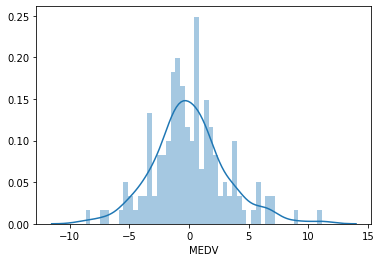

In [ ]:
sns.distplot(y_test_t3-pred_rf1,bins=50)

In [ ]:
print("training score",rf_2.score(X_train_t3,y_train_t3)*100)
print("Test score",rf_2.score(X_test_t3,y_test_t3)*100)

training score 96.1877383634285
Test score 86.18963746607474


We see that the model does not do well with only its most correlated features.
This tells us that the less correlated features also play a role in determining target.

Using KFold Cross Validation and Grid Searchcv to let the model find its best parameters(n_estimators).

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
#parameters = {'n_estimators':[1,5,10,15,20,25,30,35,45,50,55,60,70,75]}
parameters = {'n_estimators':np.arange(5,105,5)}
cv = KFold(n_splits=20,random_state=10,shuffle=True)
rforest = RandomForestRegressor()
clf = GridSearchCV(rforest,param_grid=parameters,cv=cv)

In [ ]:
df.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
clf.fit(X_train,y_train)

C:\Users\Khalandar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=20, random_state=10, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=N

In [ ]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=70,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
clf.best_score_

0.8382567258209748

In [ ]:
clf.best_params_

{'n_estimators': 70}

In [ ]:
pred_clf=clf.predict(X_test)

In [ ]:
result = pd.DataFrame(data=y_test,columns=["Y Test"])
result["Prediction"] = pred_clf

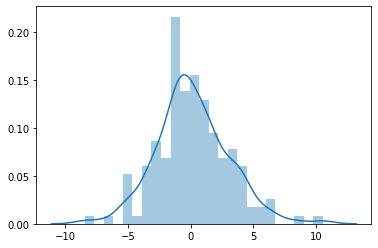

In [ ]:
sns.distplot(y_test-pred_clf,bins=25)

In [ ]:
result

,Y Test,Prediction
0,28.2,29.200000
1,23.9,26.911429
2,16.6,19.942857
3,22.0,20.851429
4,20.8,19.097143
...,...,...
147,19.1,15.064286
148,28.4,28.164286
149,20.5,18.421429
150,33.8,31.301429


Text(0.5, 1.0, 'True Vs Predcited values')

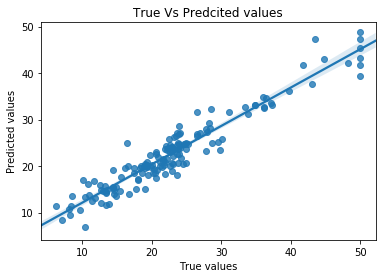

In [ ]:
sns.regplot(y_test,pred_clf)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True Vs Predcited values")

In [ ]:
print("training score",clf.score(X_train,y_train)*100)
print("Test score",clf.score(X_test,y_test)*100)

training score 97.88811693287275
Test score 90.77585494060295


Lets now remove outliers in 'MEDV'.

In [ ]:
df[df["MEDV"]>=40].shape[0]

31

In [ ]:
df["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [ ]:
data=df[~(df["MEDV"]>=45)]

In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


(0, 14)

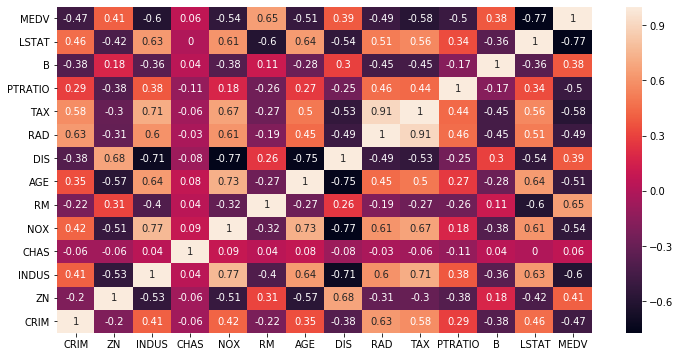

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr().round(2),annot=True)
plt.ylim(0,data.shape[1])

In [ ]:
for k,v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3-q1 # inter quantile range
    #get all the rows beyond +-1.5 iqr 
    v_col = v[(v <= q1 - 1.5 * iqr) | (v>= q3 + 1.5 * iqr)]
    percentage = v_col.shape[0] *100 / np.shape(data)[0] 
    print("Column %s outliers =%.2f%%" %(k,percentage))

Column CRIM outliers =13.43%
Column ZN outliers =13.22%
Column INDUS outliers =0.00%
Column CHAS outliers =100.00%
Column NOX outliers =0.00%
Column RM outliers =3.72%
Column AGE outliers =0.00%
Column DIS outliers =1.03%
Column RAD outliers =0.00%
Column TAX outliers =0.00%
Column PTRATIO outliers =2.48%
Column B outliers =15.50%
Column LSTAT outliers =1.45%
Column MEDV outliers =3.72%


In [ ]:
X_d = data.iloc[:,:-1]
y_d = data.iloc[:,-1].values

In [ ]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_d, y_d, test_size=0.3, random_state=1)

>We do not consider the CHAS(Charles River variable(0/1)) columns as it has 100% outliers(reason maybe due to it being a binary data).\
Among 'TAX' and 'RAD' we only pick one feature as they are highly correlated to eachother,we see that 'INDUS' is having correlation of 0.72 with 'TAX' and '0.6' with RAD  so we pick 'RAD' as it has relatively less correlation with 'INDUS'.\
So we are left with 'INDUS', 'NOX', 'AGE', 'RAD', 'RM', 'LSTAT', 'PTRATIO', 'B', 'DIS', 'ZN' and 'CRIM' features.

In [ ]:
X_train_n = X_train_n[['INDUS','NOX','AGE','RAD','RM','LSTAT','PTRATIO','B','DIS','ZN','CRIM']]
X_test_n = X_test_n[['INDUS','NOX','AGE','RAD','RM','LSTAT','PTRATIO','B','DIS','ZN','CRIM']]

In [ ]:
r_forest_1 = RandomForestRegressor(n_estimators=100)

In [ ]:
r_forest_1.fit(X_train_n,y_train_n)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
preds_f = r_forest_1.predict(X_test_n)

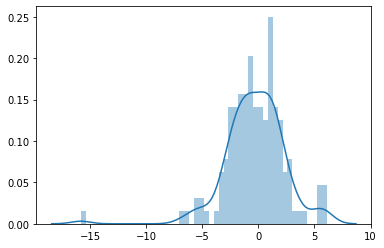

In [ ]:
sns.distplot(y_test_n-preds_f,bins=50)

In [ ]:
result = pd.DataFrame(data=y_test_n,columns=["Y Test"])
result["Prediction"] = preds_f

In [ ]:
result

,Y Test,Prediction
0,14.5,19.431
1,30.1,31.587
2,29.1,28.580
3,23.0,19.781
4,22.6,23.256
...,...,...
141,28.4,26.891
142,20.5,18.988
143,14.5,16.264
144,20.4,20.638


In [ ]:
print("training score",r_forest_1.score(X_train_n,y_train_n)*100)
print("Test score",r_forest_1.score(X_test_n,y_test_n)*100)

training score 97.52013270307216
Test score 85.29113559263392


>We observe that by dropping 'TAX' variable which had corelation with 'RAD' and 'CHAS'  that had outliers we were not able to improve model performance.\
Performing 'GridSearchCv' with 'KFold crossvalidation' on features excluding 'TAX' and 'CHAS'

In [ ]:
rfr = RandomForestRegressor()
cv1 = KFold(n_splits=20,random_state=10,shuffle=True)
clf = GridSearchCV(rfr,param_grid=parameters,cv=cv)
clf.fit(X_train_n,y_train_n)

C:\Users\Khalandar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=20, random_state=10, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=N

In [ ]:
print("training score",clf.score(X_train_n,y_train_n)*100)
print("Test score",clf.score(X_test_n,y_test_n)*100)

training score 97.72207324009298
Test score 86.1421918818089


Conclusion:
>'Our Random Forest Model with n_estimators=100 gave the best performance on entire dataset'

In [ ]:
results = pd.DataFrame(data=y_test,columns=["actual"])
results["predicted"]=pred_rf.reshape(len(pred_lm),1)
results

,actual,predicted
0,28.2,29.710
1,23.9,27.817
2,16.6,20.211
3,22.0,21.067
4,20.8,19.988
...,...,...
147,19.1,14.782
148,28.4,28.056
149,20.5,18.394
150,33.8,30.629


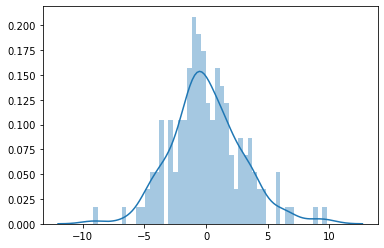

In [ ]:
sns.distplot(y_test-pred_rf,bins=50)

Text(0, 0.5, 'Predictions')

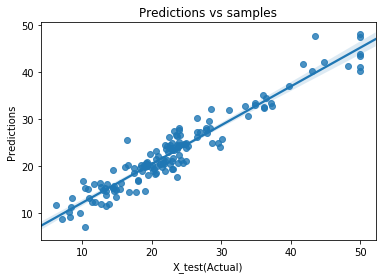

In [ ]:
sns.regplot(y_test,pred_rf)
plt.title("Predictions vs samples")
plt.xlabel("X_test(Actual)")
plt.ylabel("Predictions")

In [ ]:
print("Mean absolute Error: ",mean_absolute_error(y_test,pred_rf))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_rf))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,pred_rf)))

Mean absolute Error:  2.202677631578947
Mean Squared Error:  8.350172046052627
RMSE:  2.889666424702448


In [ ]:
print("TRAIN SOCRE(R squared):  ",rfscore_train)
print("TEST SCORE(Rsquared):  ",rfscore_test)

TRAIN SOCRE(R squared):   98.07730949221694
TEST SCORE(Rsquared):   90.88951091202104


Determining Median Value of House ('MEDV') of the house given its Feature values.

In [ ]:
rand_index = np.random.randint(0,df.shape[0])

In [ ]:
rand_index

320

In [ ]:
sample = X.iloc[rand_index].values

In [ ]:
sample.reshape(-1,len(sample))

array([[1.6760e-01, 0.0000e+00, 7.3800e+00, 0.0000e+00, 4.9300e-01,
        6.4260e+00, 5.2300e+01, 4.5404e+00, 5.0000e+00, 2.8700e+02,
        1.9600e+01, 3.9690e+02, 7.2000e+00]])

In [ ]:
original_price =y[rand_index]

In [ ]:
pred_sample_rf=rf.predict(sample.reshape(-1,len(sample)))[0]

In [ ]:
print("Original Price: "+str(original_price))
print("Predicted Price: "+str(pred_sample_rf))

Original Price: 23.8
Predicted Price: 24.108999999999984


In [ ]:
df.iloc[rand_index]

CRIM         0.1676
ZN           0.0000
INDUS        7.3800
CHAS         0.0000
NOX          0.4930
RM           6.4260
AGE         52.3000
DIS          4.5404
RAD          5.0000
TAX        287.0000
PTRATIO     19.6000
B          396.9000
LSTAT        7.2000
MEDV        23.8000
Name: 320, dtype: float64